# Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer   #collection of text document into matrix of token counts.
from sklearn.model_selection import train_test_split    #split into train and test
from sklearn.tree import DecisionTreeClassifier   #algorithm
import re   # regular expressions
import nltk   #nlp toolkit
stemmer = nltk.SnowballStemmer("english")       # SnowballStemmer is a stemming algorithm
from nltk.corpus import stopwords     # stopwords or unmeaningful words
import string   #strings

#Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
data = pd.read_csv('/content/drive/MyDrive/data science /twitter.csv')
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


Labelling the tweet according to class

In [28]:
data["labels"] = data["class"].map({0: "Hate Speech", 1: "Offensive Language", 2: "No Hate and Offensive"})
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [29]:
data = data[["tweet", "labels"]]
data.sample(15)

,tweet,labels
13533,Oh I'm nasty for smoking cigarettes? And you'r...,Offensive Language
7789,Any where the $$$ at is where the pussy go...,Offensive Language
18641,RT @beethetranny: can we please stop talking a...,Hate Speech
2831,@ChaseManhatttan you become retarded,Offensive Language
14975,RT @DennisssBeauty: @VivaLaZulema looked like ...,No Hate and Offensive
8212,Bruh... @theofficialeg10 soo trash....,No Hate and Offensive
13158,My walmart tee's count as designer? RT @StonyX...,Offensive Language
22338,U got niggas an i got bitches &#127911;,Offensive Language
16166,RT @LeanandCuisine: Bitch you a hoe... check y...,Offensive Language
9771,Helga was a bitch.... And for what reason.? #H...,Offensive Language


In [30]:
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)    # URLS https, www
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)   #punctuations
    text = re.sub('\n', '', text)   #newline
    text = re.sub('\w*\d\w*', '', text)      #Matches alphanumeric [a-zA-Z0-9_] [0-9]
    text = [word for word in text.split(' ') if word not in stopword]   # un-meaningful
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]     # suffix
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)
data.head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate and Offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
5,tmadisonx shit blow meclaim faith somebodi sti...,Offensive Language
6,brighterday sit hate anoth bitch got much shi...,Offensive Language
7,caus im tire big bitch come us skinni,Offensive Language
8,amp might get ya bitch back amp that,Offensive Language
9,rhythmixx hobbi includ fight mariambitch,Offensive Language


In [31]:
data['labels'].value_counts()

Offensive Language       19190
No Hate and Offensive     4163
Hate Speech               1430
Name: labels, dtype: int64

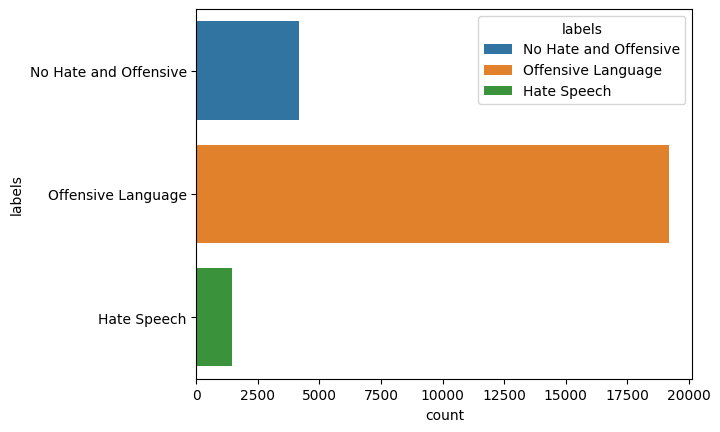

In [32]:
sns.countplot(data=data, y='labels', hue='labels', legend=True)
plt.show()

In [33]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)    #split

In [34]:
clf = DecisionTreeClassifier()      # initialize model
clf.fit(X_train,y_train)      # fit
clf.score(X_test,y_test)

0.87577943513877

In [35]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = clf.predict(data)    # predict the input text type
print(output)

Enter a Text: good morning
['No Hate and Offensive']
